In [4]:
library(plyr)
library(dplyr)
library(Hmisc)
library(viridis)  
library(naniar)
library(xtable)
library(schoRsch)
library(gmodels)
library(readr)
library(ggplot2)
library(ggdendro)
library(ggpubr)
library(factoextra)
library(FactoMineR)
library(ggcorrplot)
library(corrplot)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Loading required package: Formula
Warning message:
"package 'Formula' was built under R version 3.6.3"Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:plyr':

    is.discrete, summarize

The

# Data exploration

In [5]:
df  <- read.csv('users.db.csv');
head(df);

userid,date.crea,score,n.matches,n.updates.photo,n.photos,last.connex,last.up.photo,last.pr.update,gender,sent.ana,length.prof,voyage,laugh,photo.keke,photo.beach
1,2011-09-17,1.495834,11,5,6,2011-10-07,2011-10-02,NA,1,6.490446,0.00000,0,0,0,0
2,2017-01-17,8.946863,56,2,6,2017-01-31,2017-02-03,NA,1,4.589125,20.72286,0,0,0,1
3,2019-05-14,2.496199,13,3,4,2019-06-17,2019-06-19,NA,1,6.473182,31.39928,0,0,0,1
4,2015-11-27,2.823579,32,5,2,2016-01-15,2015-12-09,NA,0,5.368982,0.00000,0,0,0,1
5,2014-11-28,2.117433,21,1,4,2015-01-15,2015-01-02,NA,0,5.573949,38.51022,0,1,0,0
6,2017-06-05,1.700014,14,2,6,2017-07-03,2017-06-25,NA,1,5.464667,23.11221,0,0,0,0


In [6]:
dim(df)

[1] 3000   16

In [7]:
df['logScore'] <- log(df$score)

In [8]:
summary(df)

     userid            date.crea        score         n.matches    
 Min.   :   1.0   2010-04-13:   5   Min.   :0.295   Min.   : 3.00  
 1st Qu.: 750.8   2011-06-13:   5   1st Qu.:1.137   1st Qu.: 9.00  
 Median :1500.5   2013-08-29:   5   Median :1.715   Median :15.00  
 Mean   :1500.5   2014-03-14:   5   Mean   :1.953   Mean   :16.78  
 3rd Qu.:2250.2   2014-11-28:   5   3rd Qu.:2.518   3rd Qu.:23.00  
 Max.   :3000.0   2018-08-29:   5   Max.   :8.947   Max.   :61.00  
                  (Other)   :2970                                  
 n.updates.photo     n.photos          last.connex      last.up.photo 
 Min.   :-1.000   Min.   : 1.000   2011-02-19:   5   2011-02-17:   5  
 1st Qu.: 1.000   1st Qu.: 2.000   2011-12-27:   5   2015-10-07:   5  
 Median : 2.000   Median : 3.000   2014-02-27:   5   2018-12-21:   5  
 Mean   : 2.067   Mean   : 3.516   2017-12-17:   5   2009-03-28:   4  
 3rd Qu.: 3.000   3rd Qu.: 5.000   2009-03-26:   4   2010-02-15:   4  
 Max.   : 9.000   Max.   :12.0

# identifying correlations in the variables

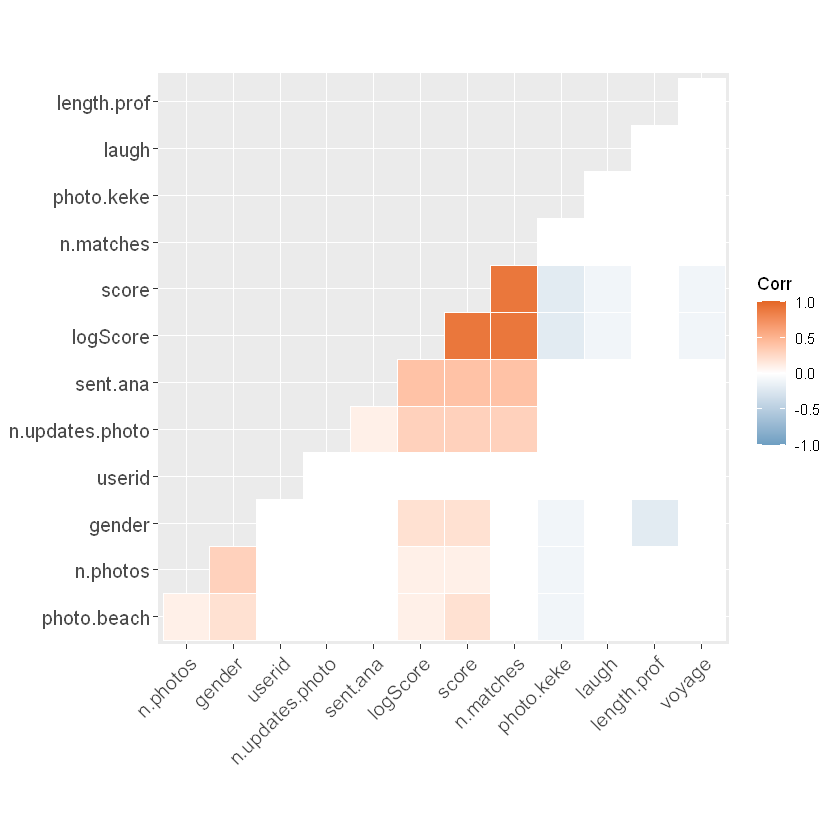

In [9]:
corr <- round(cor(dplyr::select_if(df, is.numeric)), 1)
ggcorrplot(corr, hc.order = TRUE, type = "lower",
   outline.col = "white",
   ggtheme = ggplot2::theme_gray,
   colors = c("#6D9EC1", "white", "#E46726"))

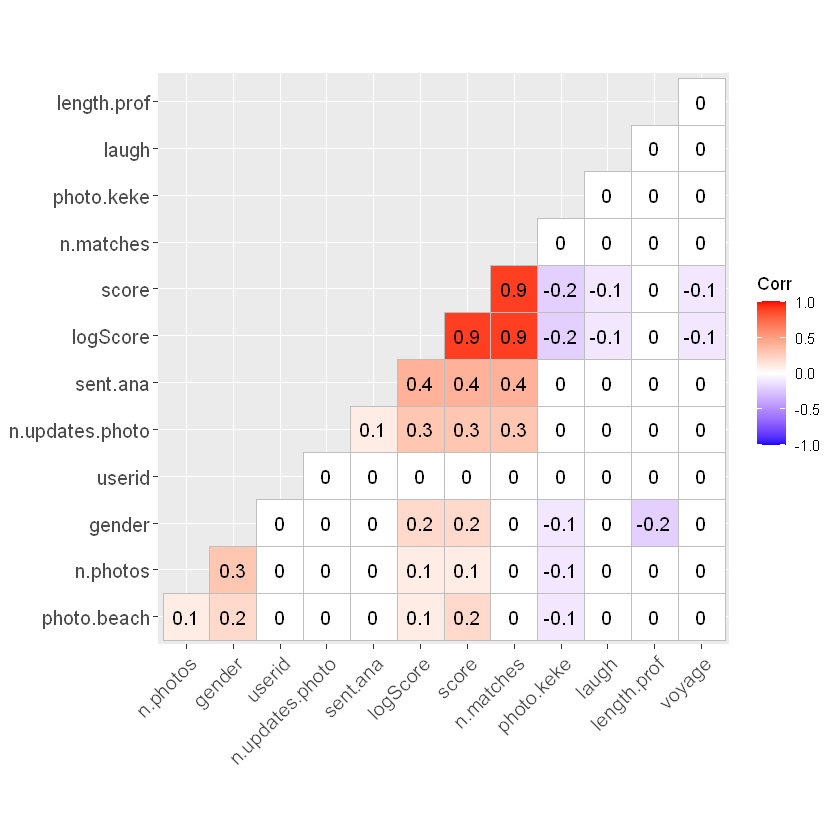

In [10]:
ggcorrplot(corr, hc.order = TRUE, type = "lower",ggtheme = ggplot2::theme_gray,
   lab = TRUE)

## cor test

In [11]:
cor.test(df$score,df$n.matches, method = 'spearman')

Warning message in cor.test.default(df$score, df$n.matches, method = "spearman"):
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  df$score and df$n.matches
S = 338158884, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9248536 


In [12]:
cor.test(df$score,df$n.matches, method = 'pearson')


	Pearson's product-moment correlation

data:  df$score and df$n.matches
t = 114.44, df = 2998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8951737 0.9085205
sample estimates:
      cor 
0.9020625 


In [13]:
lmMatchScore <- lm(n.matches ~ score, data = df)
summary(lmMatchScore)


Call:
lm(formula = n.matches ~ score, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.7697  -1.7756  -0.3048   1.8250  25.1704 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.30139    0.16451   1.832   0.0671 .  
score        8.43517    0.07371 114.437   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.358 on 2998 degrees of freedom
Multiple R-squared:  0.8137,	Adjusted R-squared:  0.8137 
F-statistic: 1.31e+04 on 1 and 2998 DF,  p-value: < 2.2e-16


In [14]:
library(ggplot2)
library(tidyr)

Warning message:
"package 'tidyr' was built under R version 3.6.3"

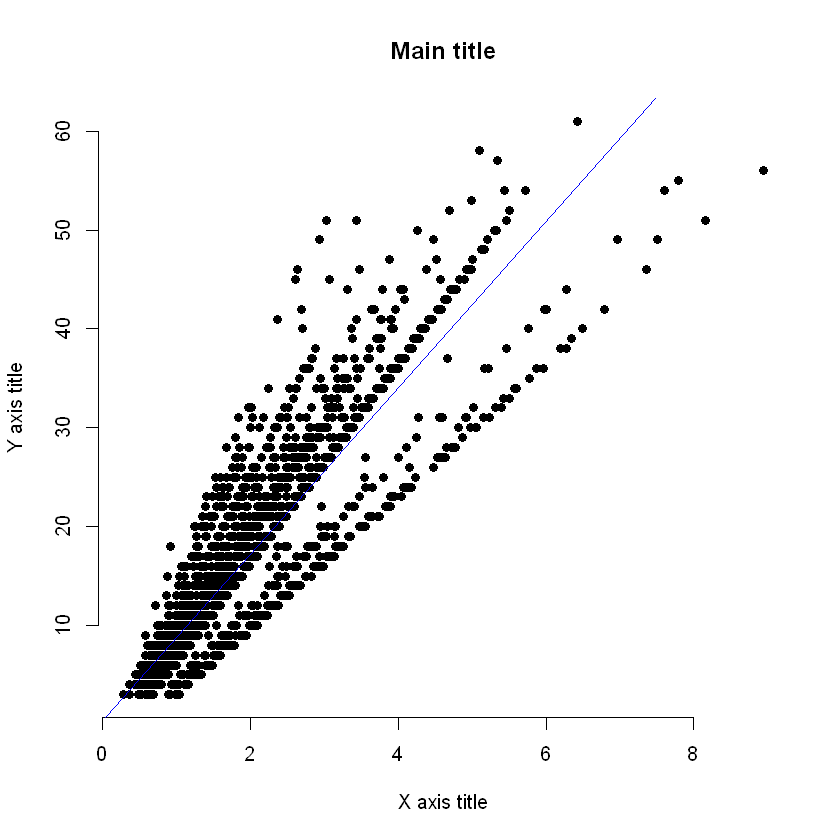

In [15]:
x <- df$score
y <- df$n.matches
# Plot with main and axis titles
# Change point shape (pch = 19) and remove frame.
plot(x, y, main = "Main title",
     xlab = "X axis title", ylab = "Y axis title",
     pch = 19, frame = FALSE)
# Add regression line
plot(x, y, main = "Main title",
     xlab = "X axis title", ylab = "Y axis title",
     pch = 19, frame = FALSE)
abline(lm(y ~ x, data = mtcars), col = "blue")

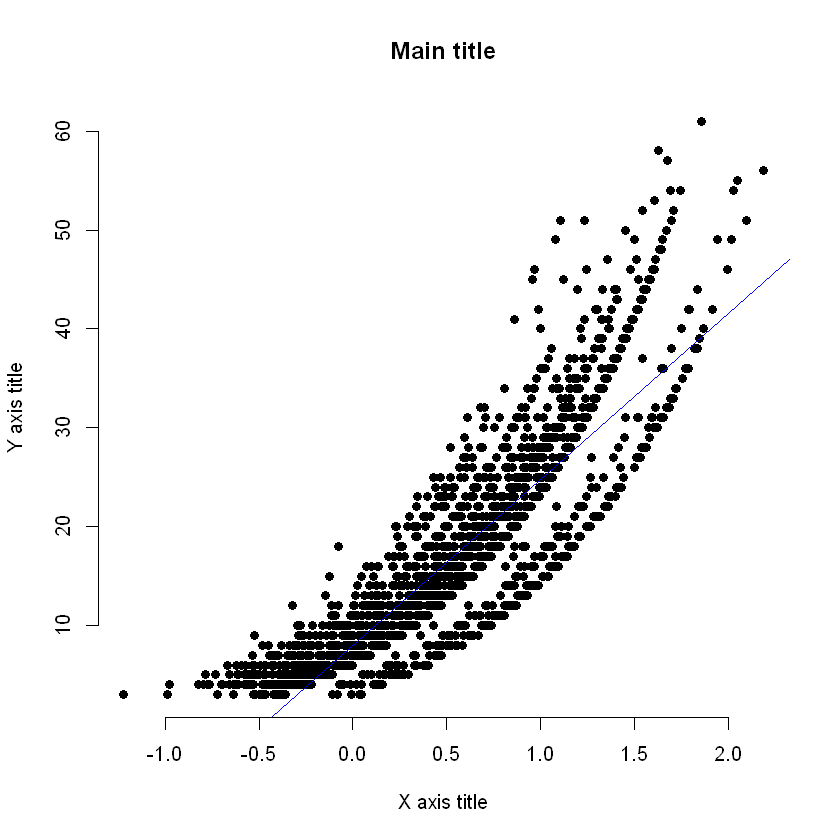

In [16]:
x <- df$logScore
y <- df$n.matches
# Plot with main and axis titles
# Change point shape (pch = 19) and remove frame.
plot(x, y, main = "Main title",
     xlab = "X axis title", ylab = "Y axis title",
     pch = 19, frame = FALSE)
# Add regression line
plot(x, y, main = "Main title",
     xlab = "X axis title", ylab = "Y axis title",
     pch = 19, frame = FALSE)
abline(lm(y ~ x, data = mtcars), col = "blue")

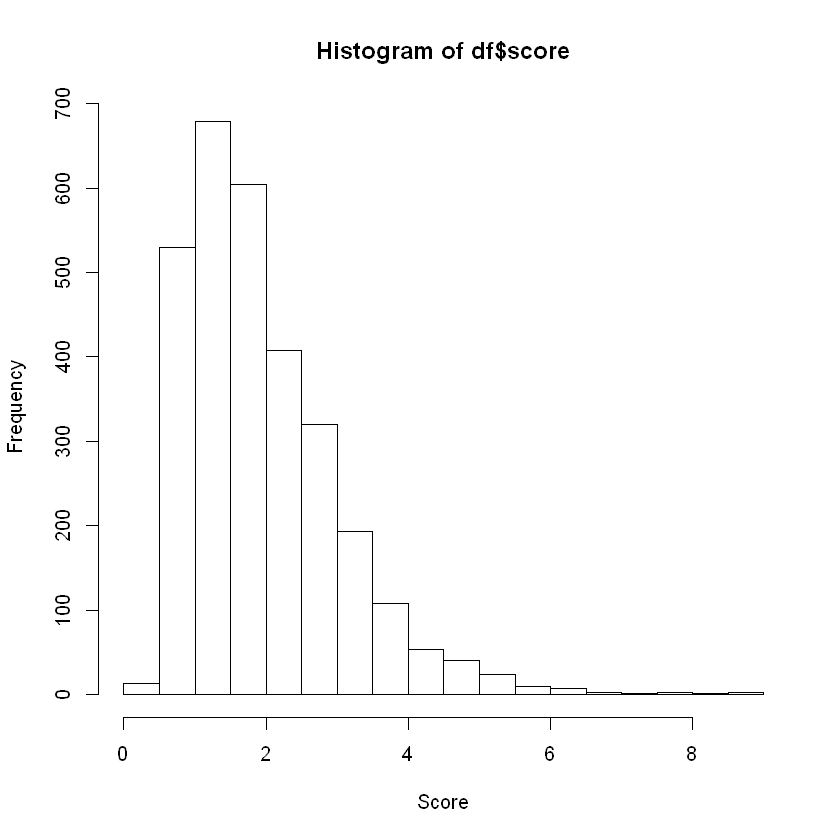

In [17]:
hist(df$score, xlab='Score')

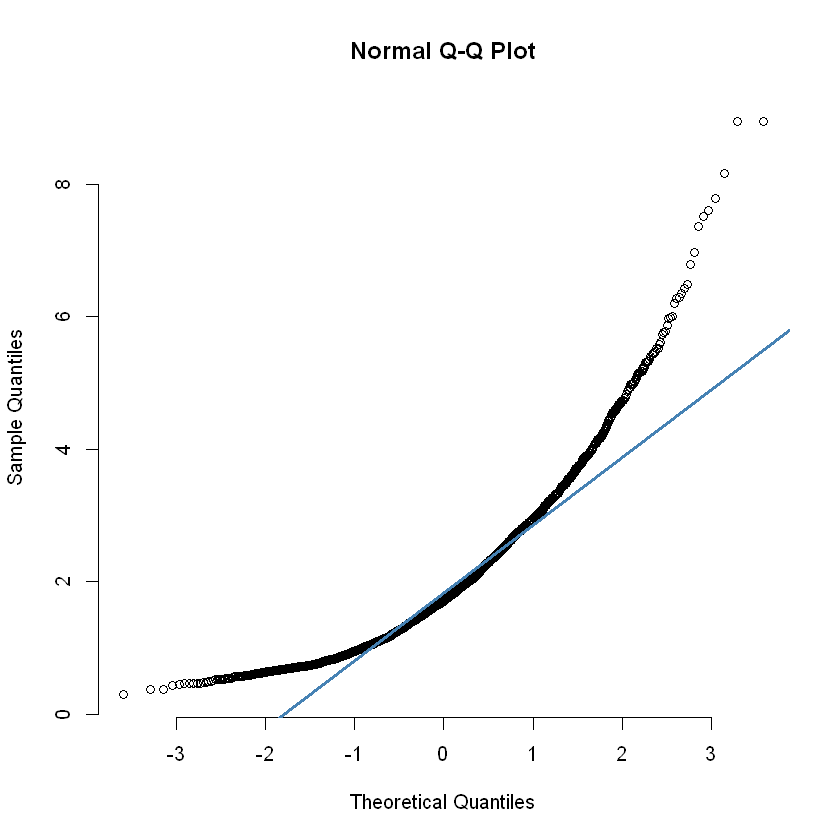

In [18]:
qqnorm(df$score, pch = 1, frame = FALSE)
qqline(df$score ,col = "steelblue", lwd = 3)

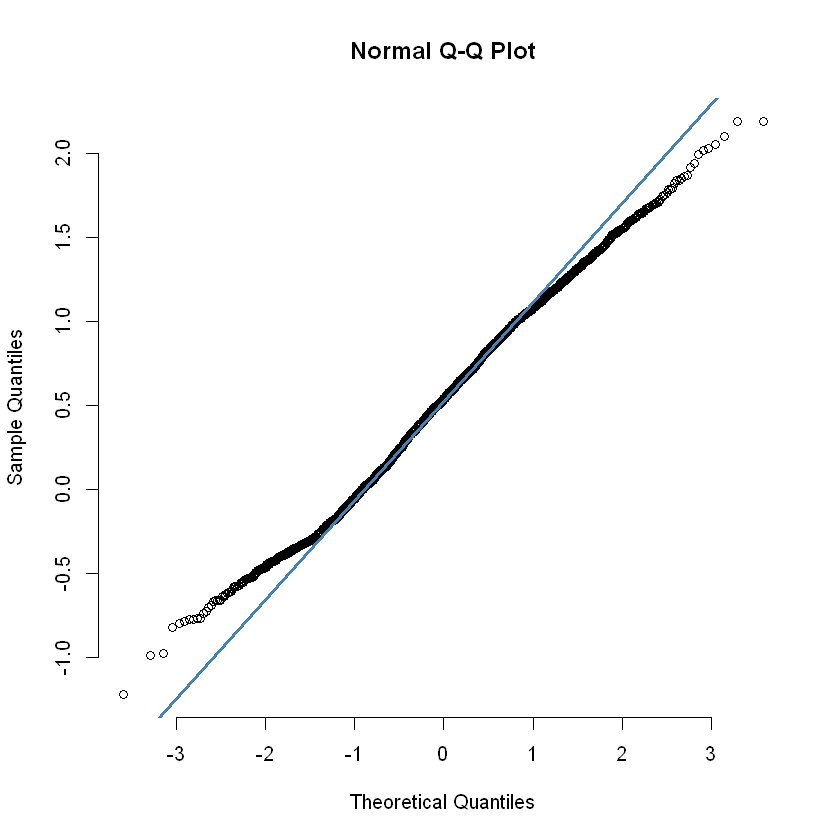

In [19]:
qqnorm(df$logScore, pch = 1, frame = FALSE)
qqline(df$logScore ,col = "steelblue", lwd = 3)

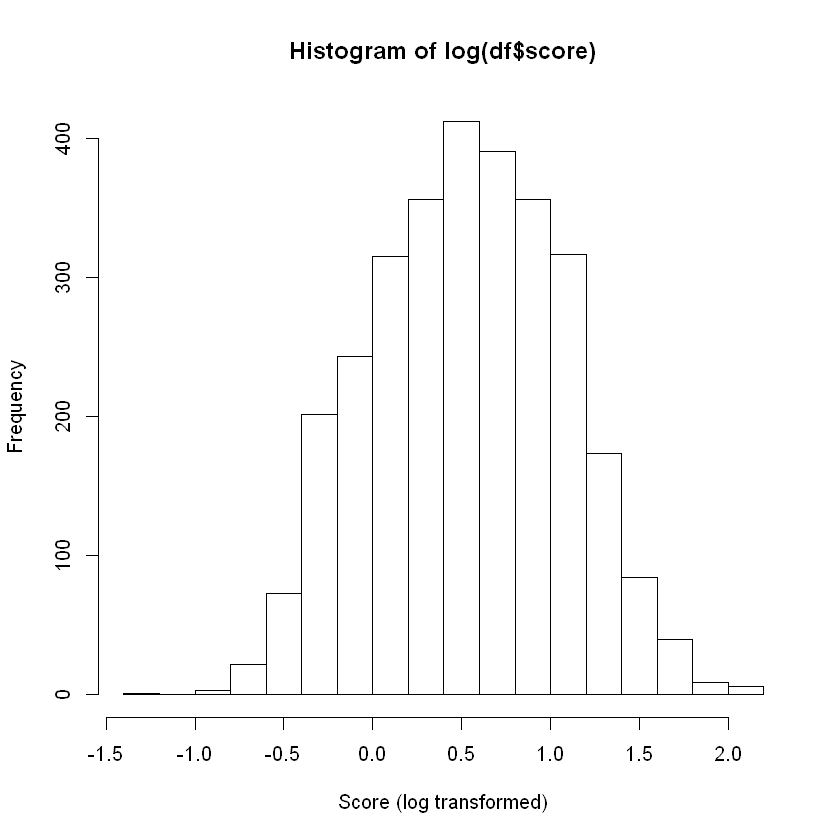

In [20]:
hist(log(df$score),xlab='Score (log transformed)')

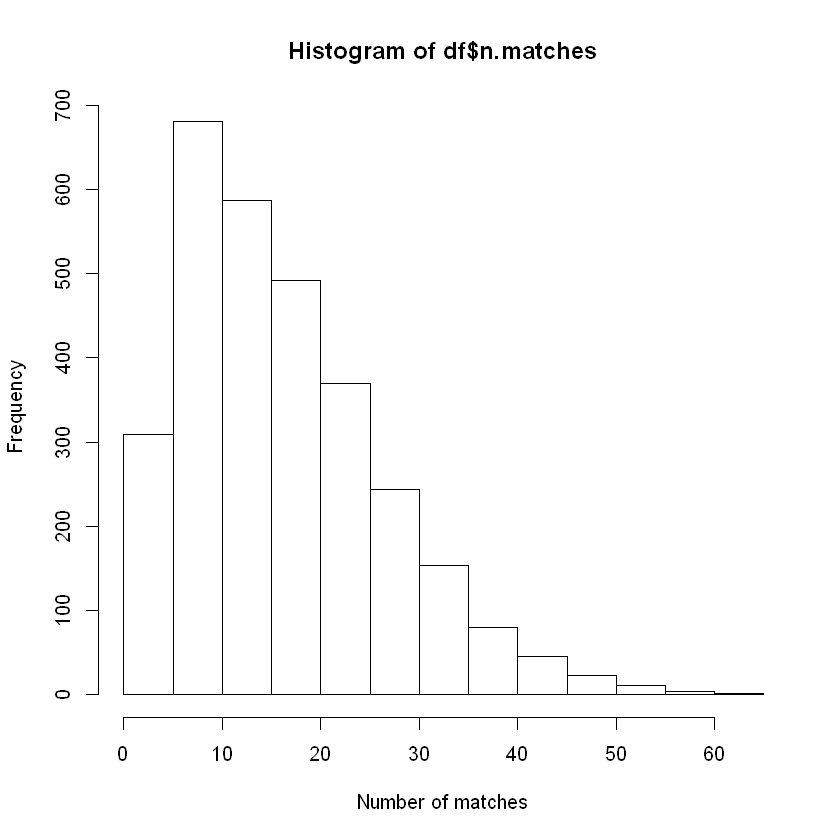

In [21]:
hist(df$n.matches,xlab='Number of matches')

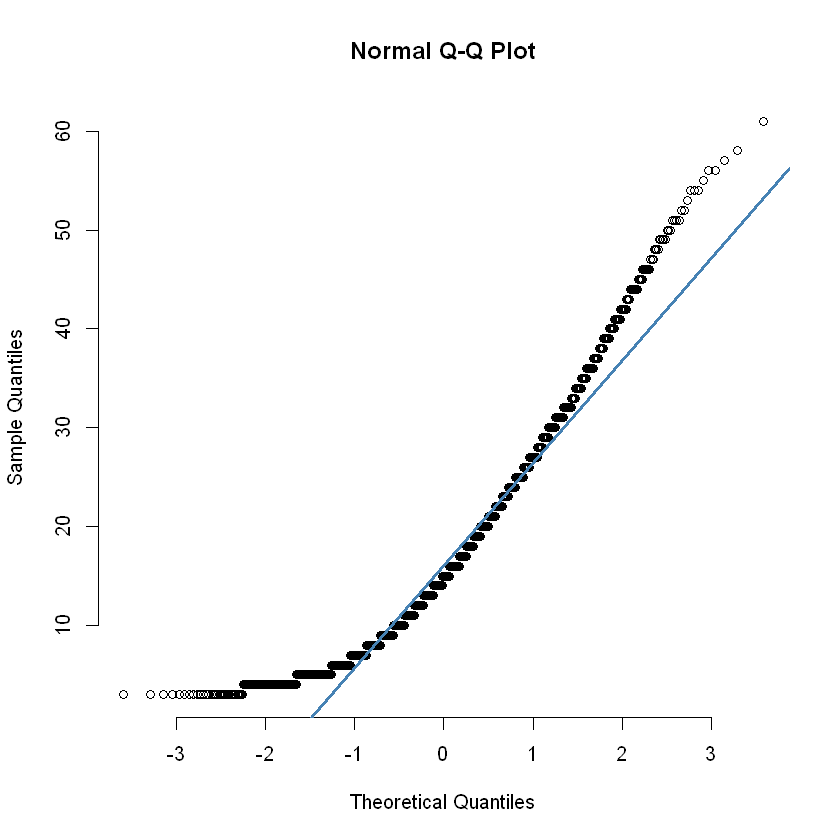

In [22]:
qqnorm((df$n.matches), pch = 1, frame = FALSE)
qqline((df$n.matches) ,col = "steelblue", lwd = 3)

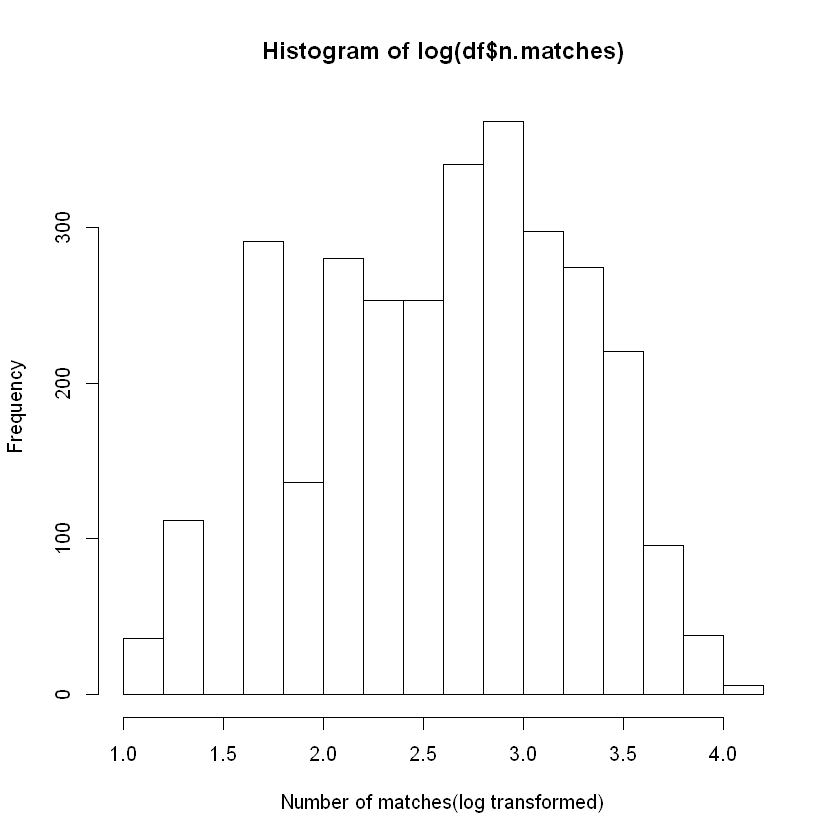

In [23]:
hist(log(df$n.matches),xlab='Number of matches(log transformed)')

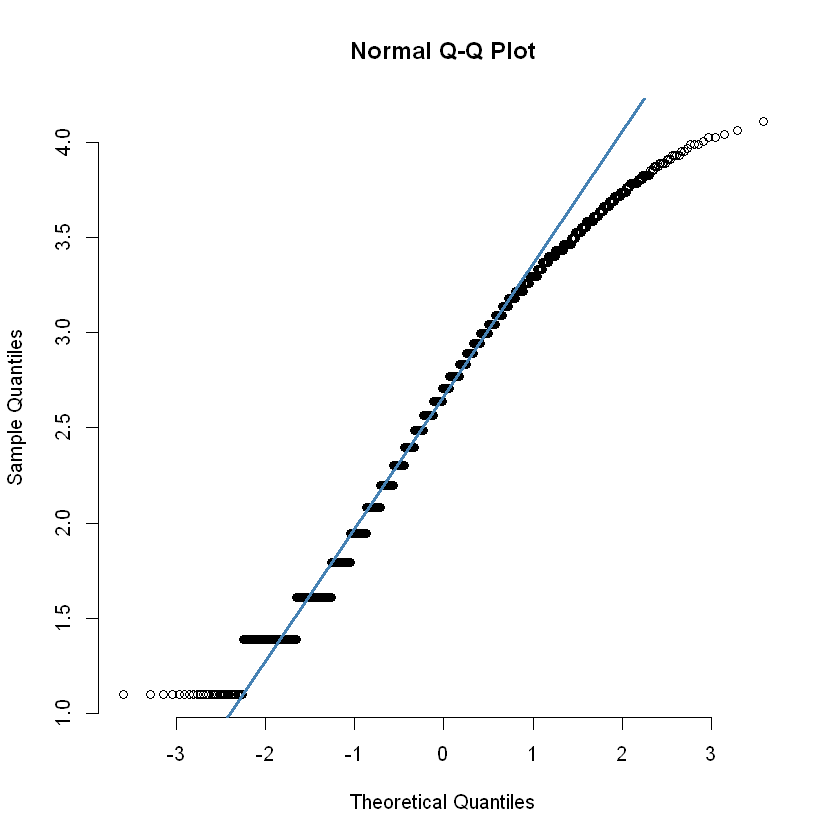

In [24]:
qqnorm(log(df$n.matches), pch = 1, frame = FALSE)
qqline(log(df$n.matches) ,col = "steelblue", lwd = 3)

In [25]:
df["logNofMatches"]<- log(df$n.matches)

# Linear model with Step function

In [26]:
mod <- lm(log(n.matches) ~ log(df$score)+gender+gender*photo.keke+gender*photo.beach, data = df)
summary(mod)


Call:
lm(formula = log(n.matches) ~ log(df$score) + gender + gender * 
    photo.keke + gender * photo.beach, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50512 -0.06938 -0.02664  0.07942  1.27195 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.973230   0.004892 403.327   <2e-16 ***
log(df$score)       1.235347   0.004952 249.471   <2e-16 ***
gender             -0.002850   0.005572  -0.511    0.609    
photo.keke          0.443828   0.008728  50.848   <2e-16 ***
photo.beach         0.179600   0.011434  15.707   <2e-16 ***
gender:photo.keke  -0.371940   0.013726 -27.098   <2e-16 ***
gender:photo.beach -0.605597   0.013395 -45.211   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1374 on 2993 degrees of freedom
Multiple R-squared:  0.9542,	Adjusted R-squared:  0.9541 
F-statistic: 1.038e+04 on 6 and 2993 DF,  p-value: < 2.2e-16


In [27]:
step(mod,direction = c('both'))

Start:  AIC=-11902.82
log(n.matches) ~ log(df$score) + gender + gender * photo.keke + 
    gender * photo.beach

                     Df Sum of Sq     RSS    AIC
<none>                              56.49 -11903
- gender:photo.keke   1     13.86   70.35 -11247
- gender:photo.beach  1     38.58   95.07 -10343
- log(df$score)       1   1174.67 1231.17  -2660



Call:
lm(formula = log(n.matches) ~ log(df$score) + gender + gender * 
    photo.keke + gender * photo.beach, data = df)

Coefficients:
       (Intercept)       log(df$score)              gender          photo.keke  
           1.97323             1.23535            -0.00285             0.44383  
       photo.beach   gender:photo.keke  gender:photo.beach  
           0.17960            -0.37194            -0.60560  


In [28]:
step(mod,direction = c('backward'))

Start:  AIC=-11902.82
log(n.matches) ~ log(df$score) + gender + gender * photo.keke + 
    gender * photo.beach

                     Df Sum of Sq     RSS    AIC
<none>                              56.49 -11903
- gender:photo.keke   1     13.86   70.35 -11247
- gender:photo.beach  1     38.58   95.07 -10343
- log(df$score)       1   1174.67 1231.17  -2660



Call:
lm(formula = log(n.matches) ~ log(df$score) + gender + gender * 
    photo.keke + gender * photo.beach, data = df)

Coefficients:
       (Intercept)       log(df$score)              gender          photo.keke  
           1.97323             1.23535            -0.00285             0.44383  
       photo.beach   gender:photo.keke  gender:photo.beach  
           0.17960            -0.37194            -0.60560  


# PCA 

In [29]:
head(df)

userid,date.crea,score,n.matches,n.updates.photo,n.photos,last.connex,last.up.photo,last.pr.update,gender,sent.ana,length.prof,voyage,laugh,photo.keke,photo.beach,logScore,logNofMatches
1,2011-09-17,1.495834,11,5,6,2011-10-07,2011-10-02,NA,1,6.490446,0.00000,0,0,0,0,0.4026840,2.397895
2,2017-01-17,8.946863,56,2,6,2017-01-31,2017-02-03,NA,1,4.589125,20.72286,0,0,0,1,2.1913029,4.025352
3,2019-05-14,2.496199,13,3,4,2019-06-17,2019-06-19,NA,1,6.473182,31.39928,0,0,0,1,0.9147693,2.564949
4,2015-11-27,2.823579,32,5,2,2016-01-15,2015-12-09,NA,0,5.368982,0.00000,0,0,0,1,1.0380053,3.465736
5,2014-11-28,2.117433,21,1,4,2015-01-15,2015-01-02,NA,0,5.573949,38.51022,0,1,0,0,0.7502043,3.044522
6,2017-06-05,1.700014,14,2,6,2017-07-03,2017-06-25,NA,1,5.464667,23.11221,0,0,0,0,0.5306367,2.639057


In [30]:
numericDf <- df[c('logScore','logNofMatches','sent.ana','length.prof','n.updates.photo','n.photos')]
 str(numericDf)

'data.frame':	3000 obs. of  6 variables:
 $ logScore       : num  0.403 2.191 0.915 1.038 0.75 ...
 $ logNofMatches  : num  2.4 4.03 2.56 3.47 3.04 ...
 $ sent.ana       : num  6.49 4.59 6.47 5.37 5.57 ...
 $ length.prof    : num  0 20.7 31.4 0 38.5 ...
 $ n.updates.photo: int  5 2 3 5 1 2 1 1 -1 2 ...
 $ n.photos       : int  6 6 4 2 4 6 4 3 4 5 ...


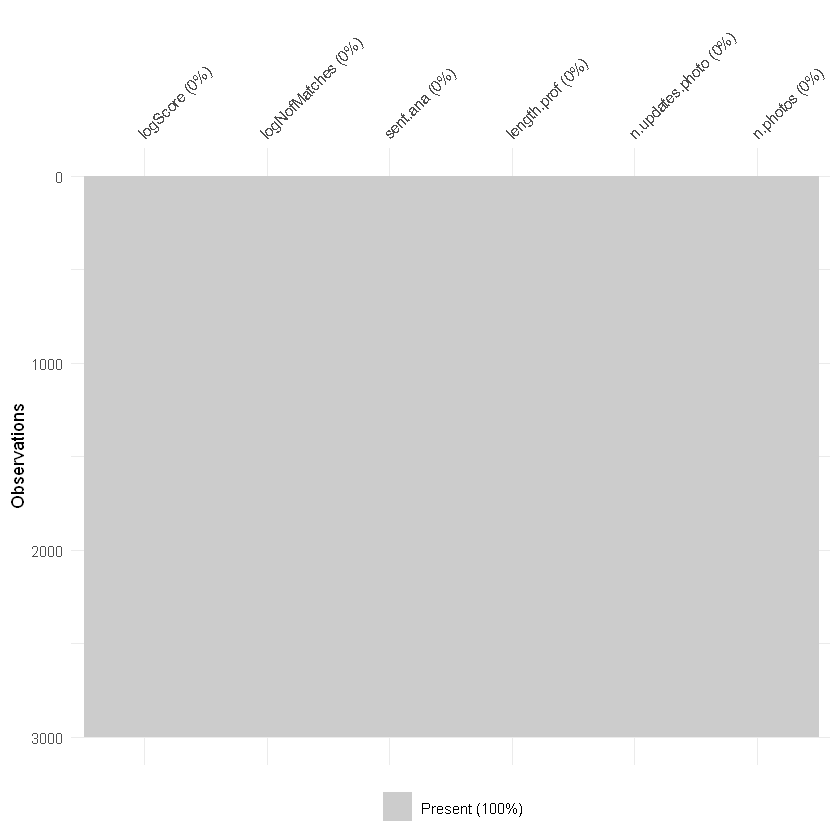

In [31]:
vis_miss(numericDf)

In [32]:
numericDf.pca <- prcomp(numericDf, center = TRUE,scale. = TRUE)

In [33]:
pca.loadings <- numericDf.pca$rotation
pca.loadings

,PC1,PC2,PC3,PC4,PC5,PC6
logScore,0.601876778,-0.07734801,-0.055992305,-0.05756530,-0.37194776,-0.69783063
logNofMatches,0.610148785,-0.01470131,-0.023773297,-0.04930626,-0.33831250,0.71417835
sent.ana,0.388129643,0.19087235,-0.007199153,-0.54276059,0.71949976,-0.02454238
length.prof,-0.030609694,0.65578443,-0.740649798,0.12261518,-0.07274766,-0.01100016
n.updates.photo,0.337446566,0.01163808,0.090480069,0.82734412,0.43922094,-0.01985965
n.photos,0.003323539,-0.72607179,-0.662947282,-0.01154534,0.17695299,0.04317360


In [34]:
print(xtable(pca.loadings))

% latex table generated in R 3.6.1 by xtable 1.8-4 package
% Sun Nov 28 23:51:56 2021
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrrr}
  \hline
 & PC1 & PC2 & PC3 & PC4 & PC5 & PC6 \\ 
  \hline
logScore & 0.60 & -0.08 & -0.06 & -0.06 & -0.37 & -0.70 \\ 
  logNofMatches & 0.61 & -0.01 & -0.02 & -0.05 & -0.34 & 0.71 \\ 
  sent.ana & 0.39 & 0.19 & -0.01 & -0.54 & 0.72 & -0.02 \\ 
  length.prof & -0.03 & 0.66 & -0.74 & 0.12 & -0.07 & -0.01 \\ 
  n.updates.photo & 0.34 & 0.01 & 0.09 & 0.83 & 0.44 & -0.02 \\ 
  n.photos & 0.00 & -0.73 & -0.66 & -0.01 & 0.18 & 0.04 \\ 
   \hline
\end{tabular}
\end{table}


In [35]:
options(repr.plot.width=6, repr.plot.height=6)

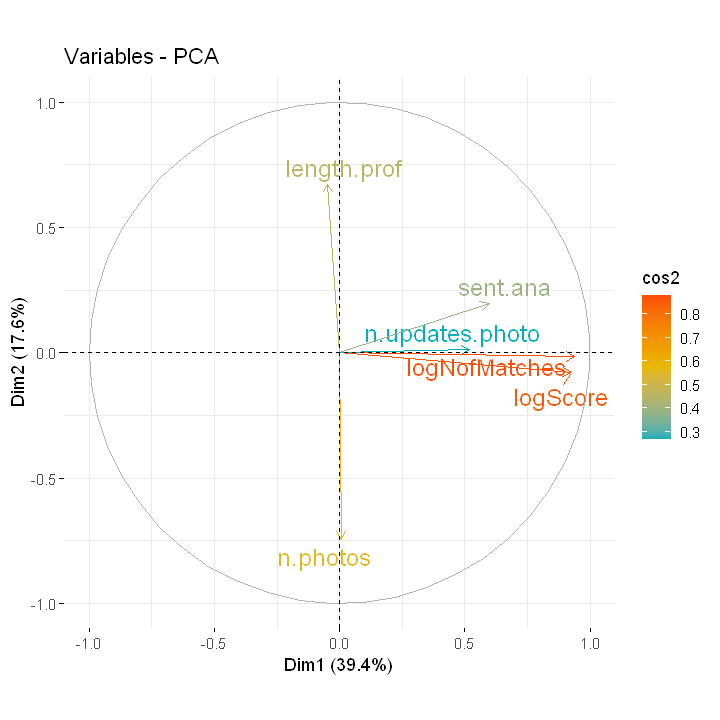

In [36]:
fviz_pca_var(numericDf.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping
             ,
             labelsize = 5,
       pointsize = 10,alpha.var = 100
             )

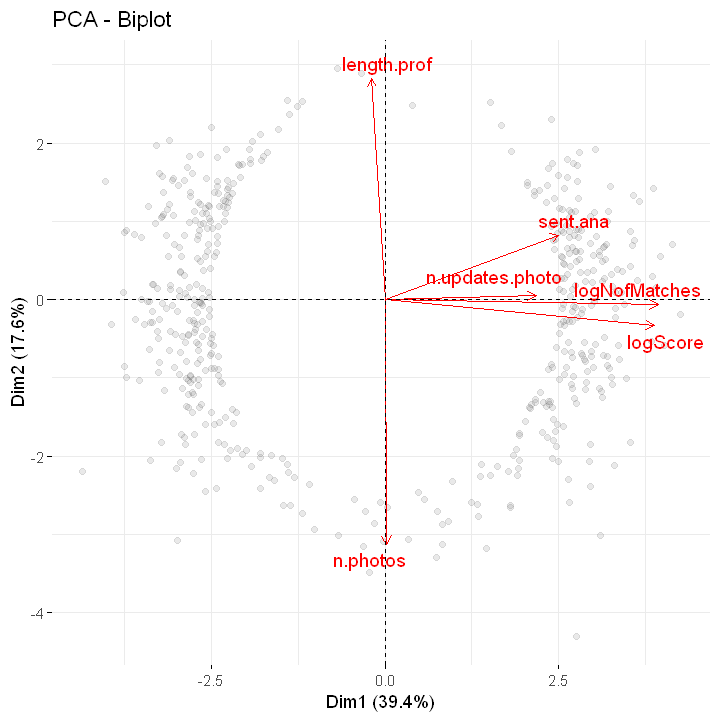

In [37]:
fviz_pca_biplot(numericDf.pca, repel = TRUE,
                col.var = "red", # Variables color
                col.ind = "#696969"  # Individuals color
                ,alpha.ind = 0.15
                ,label = "var"
                , select.ind = list(contrib=500)
                )

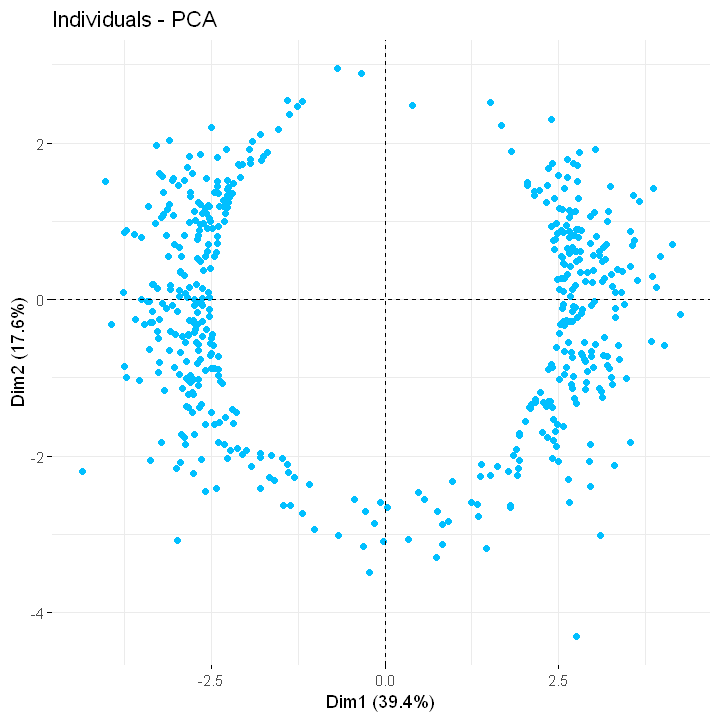

In [38]:
fviz_pca_ind(numericDf.pca, repel = TRUE,
                col.var = "black", # Variables color
                col.ind = "deepskyblue1"  # Individuals color
                ,label = "none"
            , select.ind = list(contrib=500))

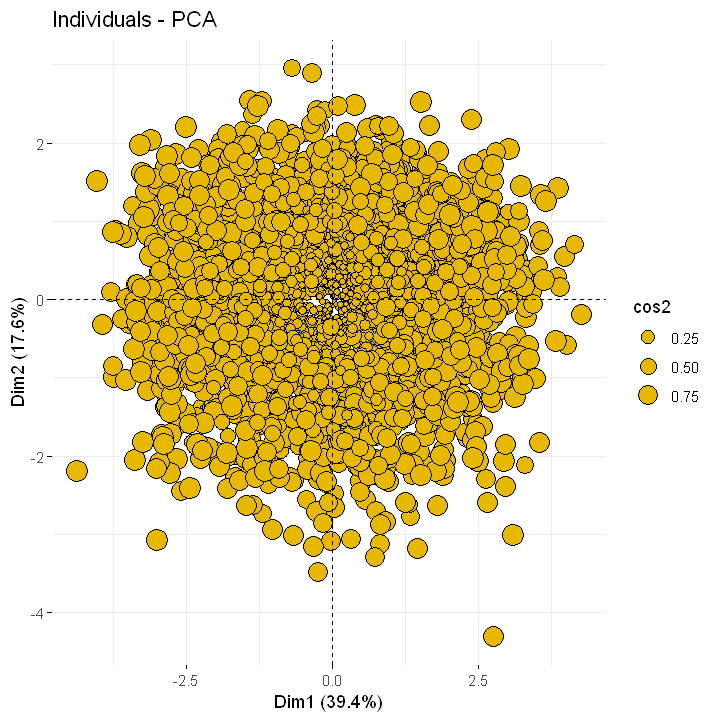

In [39]:
fviz_pca_ind(numericDf.pca,pointsize = "cos2", 
             pointshape = 21, fill = "#E7B800",
             repel = TRUE # Avoid text overlapping (slow if many points)
             ,label = "none")

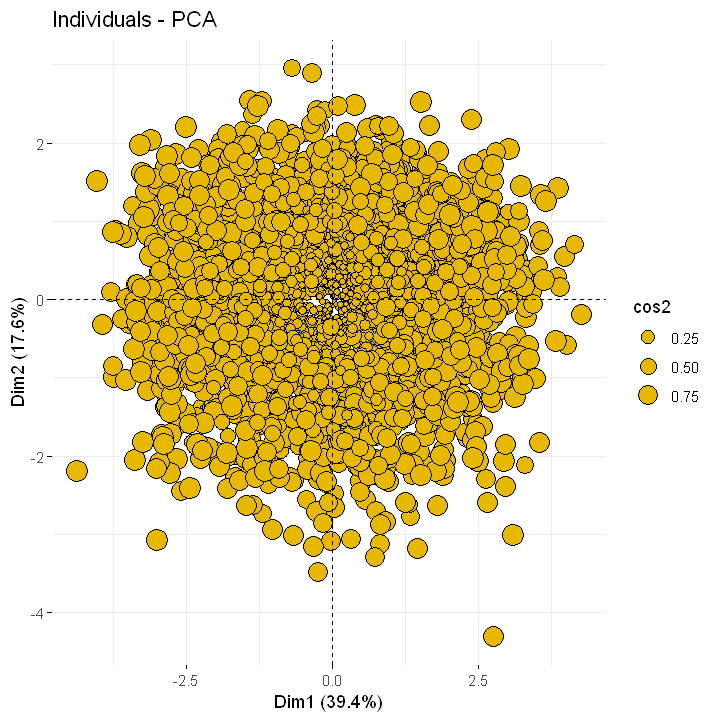

In [40]:
fviz_pca_ind(numericDf.pca,pointsize = "cos2", 
             pointshape = 21, fill = "#E7B800",
             repel = TRUE # Avoid text overlapping (slow if many points)
             ,label = "none")

In [41]:
numericDf.pca

Standard deviations (1, .., p=6):
[1] 1.5368997 1.0263637 0.9812232 0.9301763 0.8231948 0.2807849

Rotation (n x k) = (6 x 6):
                         PC1         PC2          PC3         PC4         PC5
logScore         0.601876778 -0.07734801 -0.055992305 -0.05756530 -0.37194776
logNofMatches    0.610148785 -0.01470131 -0.023773297 -0.04930626 -0.33831250
sent.ana         0.388129643  0.19087235 -0.007199153 -0.54276059  0.71949976
length.prof     -0.030609694  0.65578443 -0.740649798  0.12261518 -0.07274766
n.updates.photo  0.337446566  0.01163808  0.090480069  0.82734412  0.43922094
n.photos         0.003323539 -0.72607179 -0.662947282 -0.01154534  0.17695299
                        PC6
logScore        -0.69783063
logNofMatches    0.71417835
sent.ana        -0.02454238
length.prof     -0.01100016
n.updates.photo -0.01985965
n.photos         0.04317360

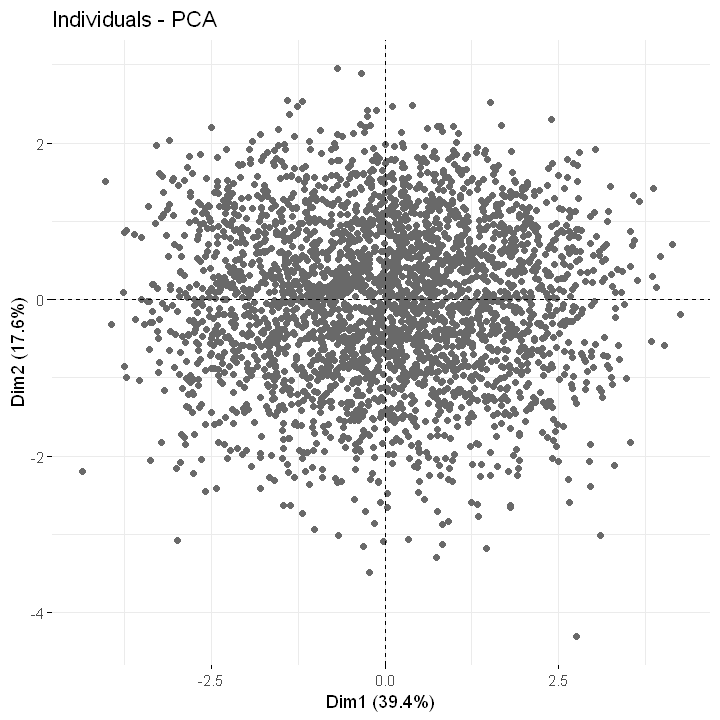

In [42]:
fviz_pca_ind(numericDf.pca, repel = TRUE,
                col.var = "black", # Variables color
                col.ind = "#696969"  # Individuals color
                ,label = "none")

In [43]:
backup_options <- options()

# You can make any changes you need, and then to revert to the default options:

options(backup_options)

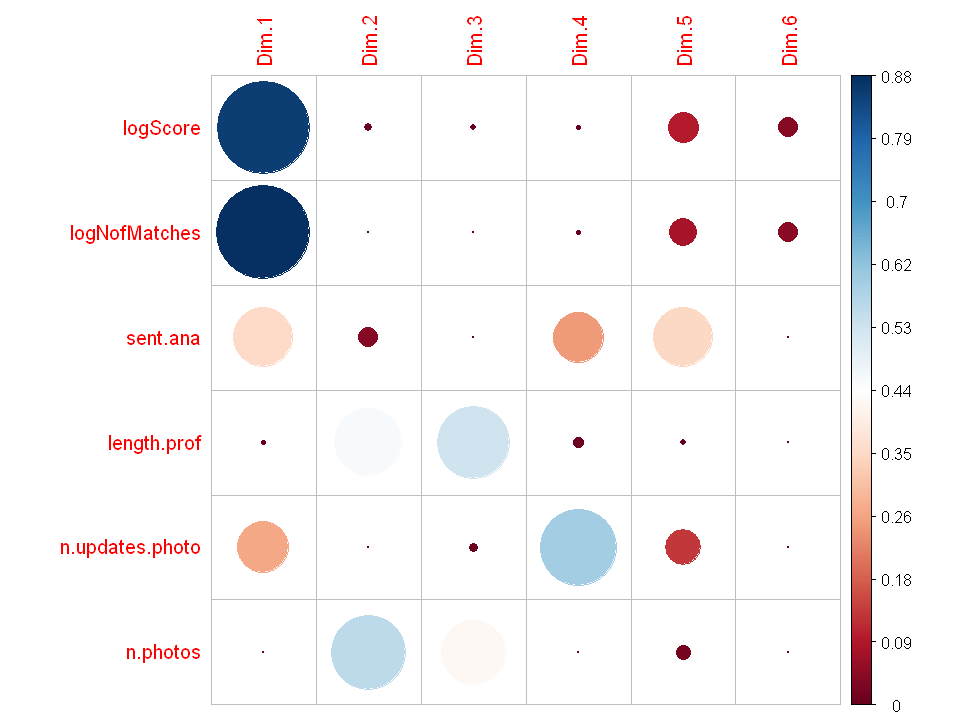

In [44]:

options(repr.plot.width=8, repr.plot.height=6)
var <- get_pca_var(numericDf.pca)

corrplot(var$cos2, is.corr=FALSE)

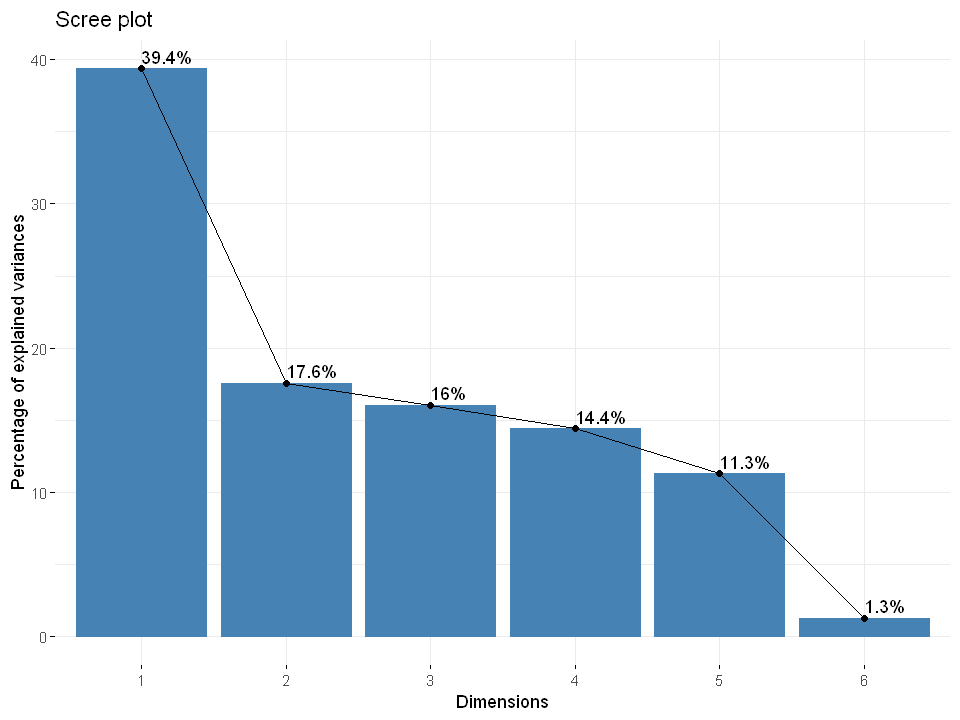

In [45]:
fviz_eig(numericDf.pca, addlabels = TRUE)

In [46]:
39.4+17.6+16

[1] 73

# MCA

In [47]:
dfcateg <- df[c('gender','voyage','laugh','photo.keke','photo.beach')] 
dfcateg$gender <- as.factor(dfcateg$gender) 
dfcateg$voyage <- as.factor(dfcateg$voyage) 
dfcateg$laugh <- as.factor(dfcateg$laugh) 
dfcateg$photo.keke <- as.factor(dfcateg$photo.keke) 
dfcateg$photo.beach <- as.factor(dfcateg$photo.beach) 

In [48]:
class(dfcateg$gender)

[1] "factor"

In [49]:
res.mca <- MCA(dfcateg, graph=FALSE)
ind <- get_mca_ind(res.mca)

In [50]:
options(repr.plot.width=5, repr.plot.height=5)


Warning message:
"Computation failed in `stat_ellipse()`:
le mineur dominant d'ordre 1 n'est pas défini positif"

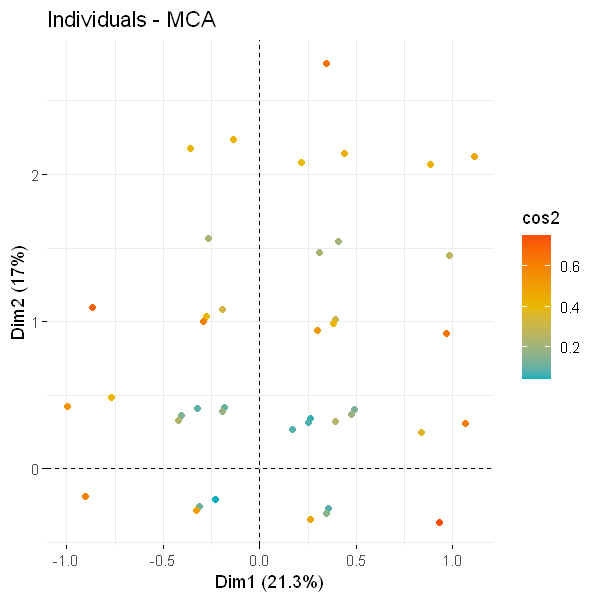

In [51]:
fviz_mca_ind(res.mca, col.ind = "cos2",
             label = "none" ,
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, # Avoid text overlapping (slow if many points)
             ggtheme = theme_minimal(),
             addEllipses = TRUE)

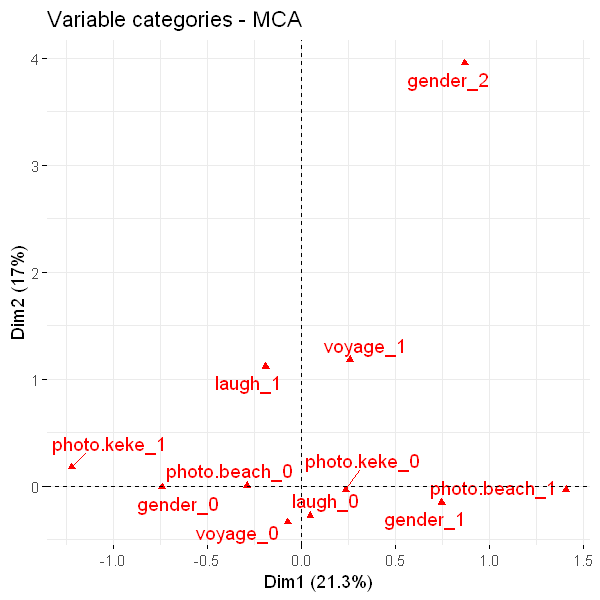

In [52]:
fviz_mca_var(res.mca, 
             repel = TRUE, # Avoid text overlapping (slow)
             ggtheme = theme_minimal())

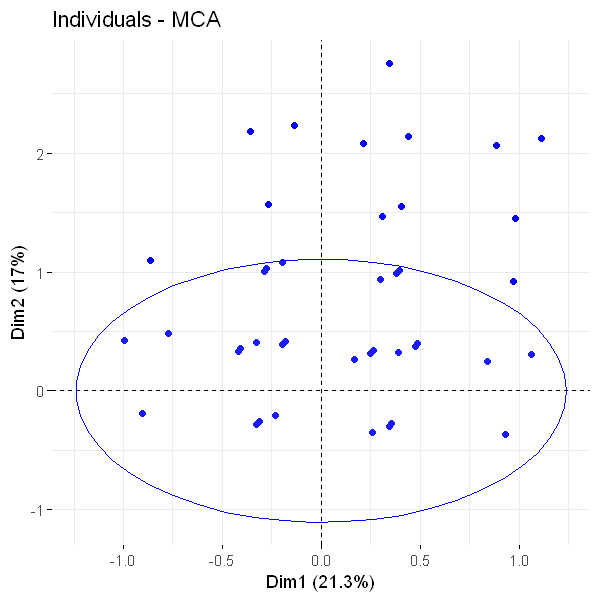

In [53]:
fviz_mca_ind(res.mca,
             addEllipses = TRUE, repel = TRUE,
             label = "none")

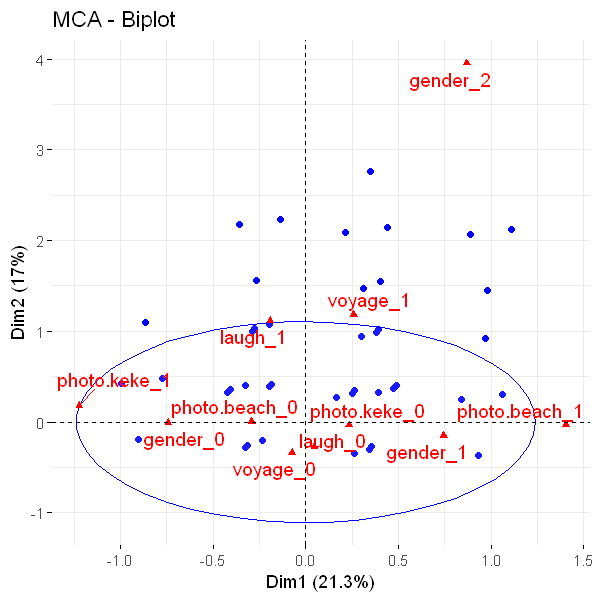

In [54]:
fviz_mca_biplot(res.mca,
             addEllipses = TRUE, repel = TRUE,label='var')

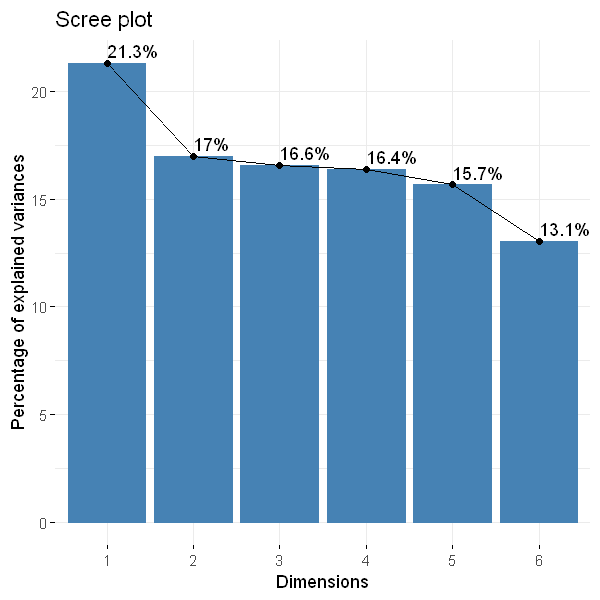

In [55]:
fviz_screeplot(res.mca, addlabels = TRUE)

# K-means

## k-means on raw dataset variables

In [57]:
# options(repr.plot.width=5, repr.plot.height=5)
# 

In [58]:
res.km <- kmeans(numericDf, 2, nstart = 25)
# K-means clusters showing the group of each individuals
head(res.km$cluster,10)

[1] 1 2 2 1 2 2 1 2 2 1

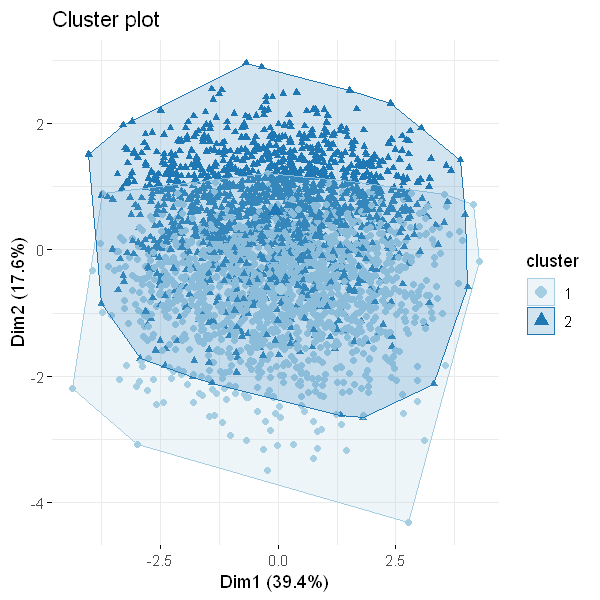

In [59]:
fviz_cluster(res.km, data = numericDf,
             palette = 'Paired', 
             geom = "point",
             ellipse.type = "convex", ggtheme = theme_minimal()
             )

## k-means on pca

In [60]:
res.km <- kmeans(numericDf.pca$x, 2)
# K-means clusters showing the group of each individuals
head(res.km$cluster,10)

[1] 2 2 2 2 2 2 1 1 1 2

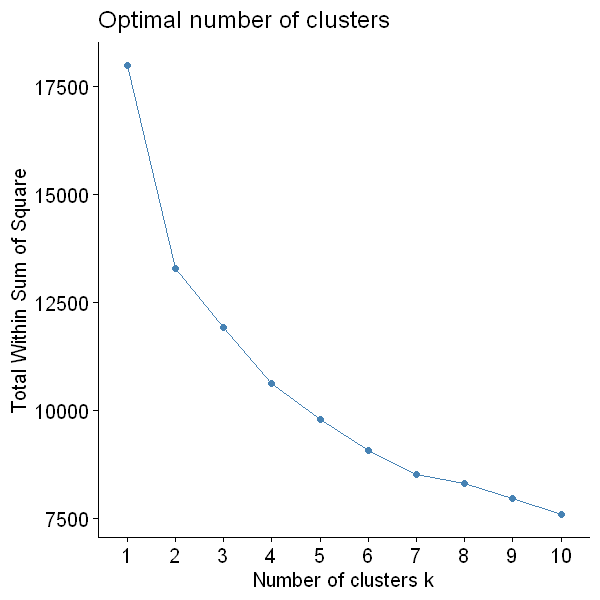

In [62]:
fviz_nbclust(numericDf.pca$x, kmeans, method = "wss")

Warning message:
"did not converge in 10 iterations"

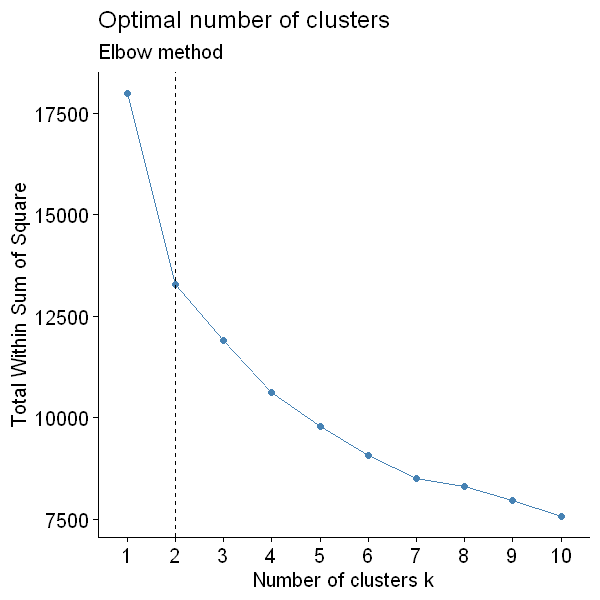

Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning mess

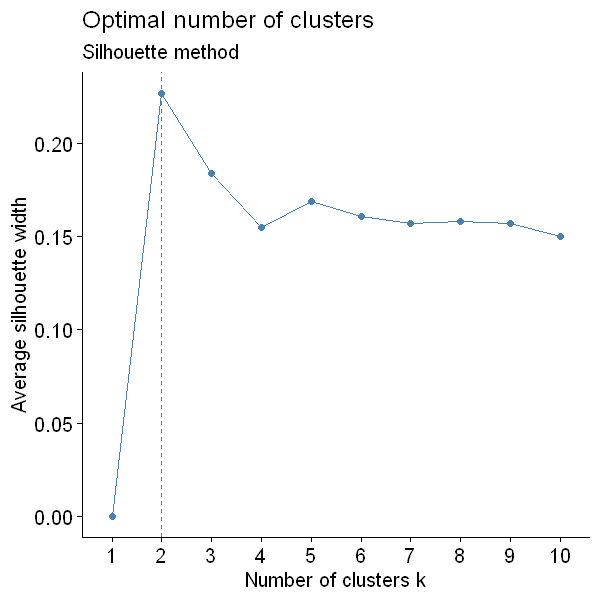

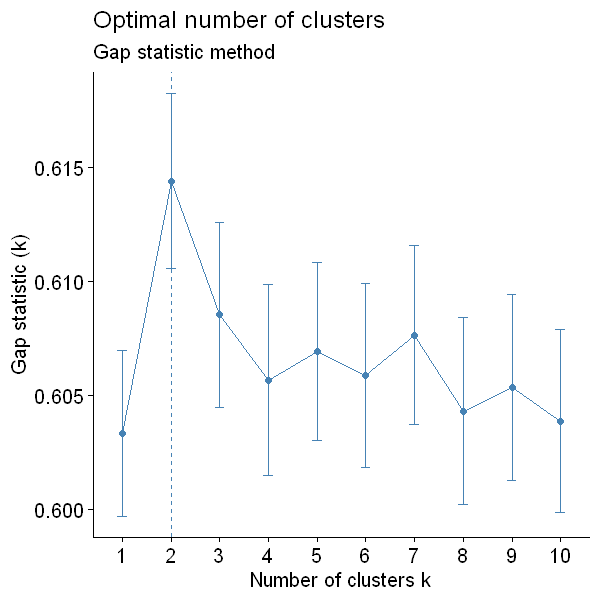

In [63]:
# Elbow method
fviz_nbclust(numericDf.pca$x, kmeans, method = "wss") +
  geom_vline(xintercept = 2, linetype = 2)+
  labs(subtitle = "Elbow method")
 
# Silhouette method
fviz_nbclust(numericDf.pca$x, kmeans, method = "silhouette")+
  labs(subtitle = "Silhouette method")
 
# Gap statistic
# nboot = 50 to keep the function speedy. 
# recommended value: nboot= 500 for your analysis.
# Use verbose = FALSE to hide computing progression.
set.seed(123)
fviz_nbclust(numericDf.pca$x, kmeans, nstart = 25,  method = "gap_stat", nboot = 50,, ylim = c(0, 50))+
  labs(subtitle = "Gap statistic method")

Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning mess

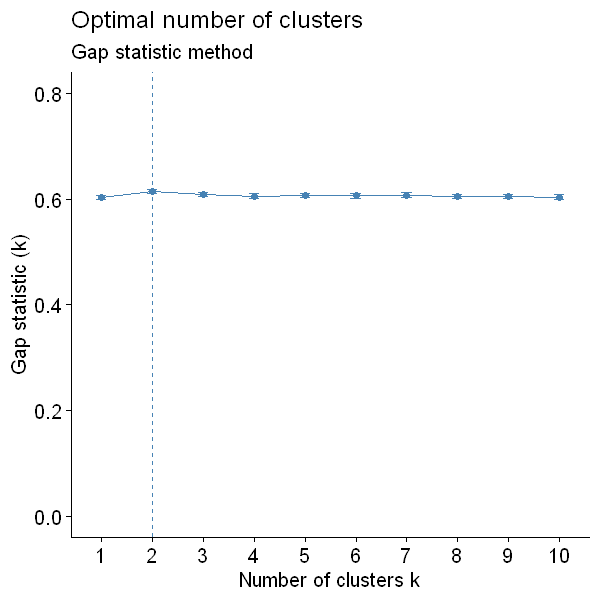

In [82]:
set.seed(123)
fviz_nbclust(numericDf.pca$x, kmeans, nstart = 25,  method = "gap_stat", nboot = 50)+
  labs(subtitle = "Gap statistic method")+
ylim(c(0, 0.8))

In [77]:
install.packages('NbClust')

Installing package into 'H:/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'NbClust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpwR2ufT\downloaded_packages


In [64]:
print(numericDf.pca)

Standard deviations (1, .., p=6):
[1] 1.5368997 1.0263637 0.9812232 0.9301763 0.8231948 0.2807849

Rotation (n x k) = (6 x 6):
                         PC1         PC2          PC3         PC4         PC5
logScore         0.601876778 -0.07734801 -0.055992305 -0.05756530 -0.37194776
logNofMatches    0.610148785 -0.01470131 -0.023773297 -0.04930626 -0.33831250
sent.ana         0.388129643  0.19087235 -0.007199153 -0.54276059  0.71949976
length.prof     -0.030609694  0.65578443 -0.740649798  0.12261518 -0.07274766
n.updates.photo  0.337446566  0.01163808  0.090480069  0.82734412  0.43922094
n.photos         0.003323539 -0.72607179 -0.662947282 -0.01154534  0.17695299
                        PC6
logScore        -0.69783063
logNofMatches    0.71417835
sent.ana        -0.02454238
length.prof     -0.01100016
n.updates.photo -0.01985965
n.photos         0.04317360


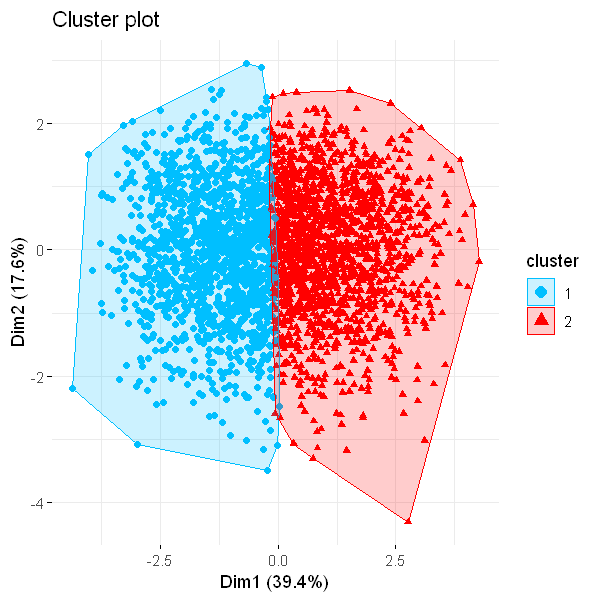

In [65]:
fviz_cluster(res.km, data = numericDf,
   palette =  c("deepskyblue1", "red"), 
             geom = "point",
             ellipse.type = "convex", 
             ggtheme = theme_minimal()
             )

# HC

In [66]:
res.pca <- PCA(numericDf, graph=FALSE)
# Clustering, auto nb of clusters:
hc <- HCPC(res.pca, nb.clust=2)

Warning message in title(main, sub, ...):
""palette" n'est pas un paramètre graphique"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""palette" n'est pas un paramètre graphique"

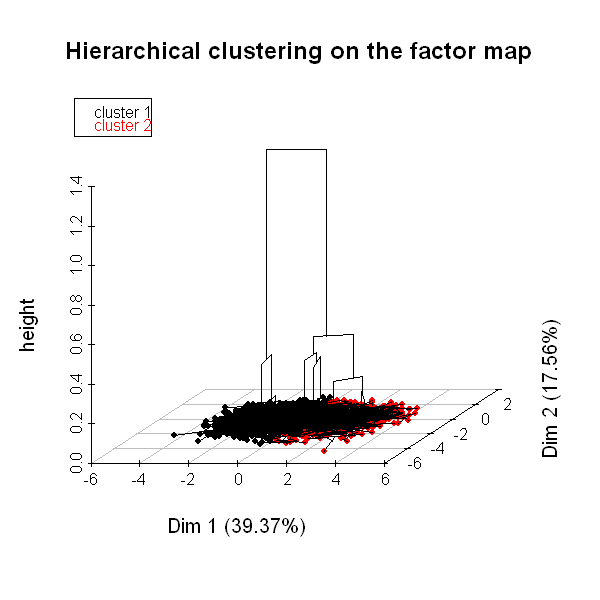

In [67]:
plot(hc, ind.names=FALSE,palette='Paired')

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."

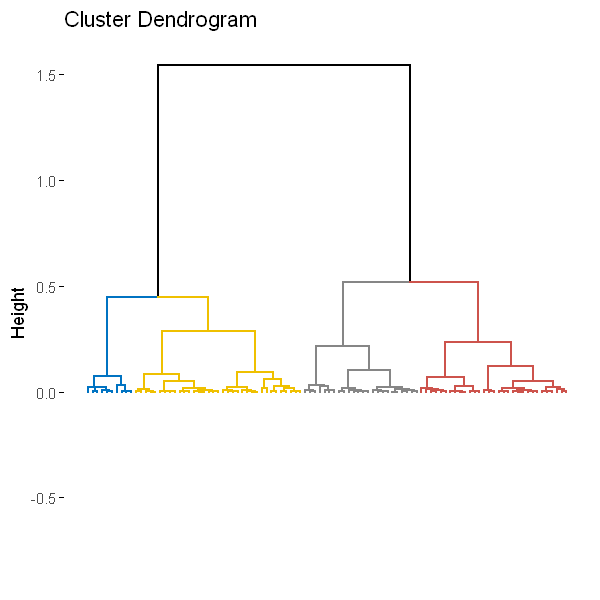

In [68]:
numericDfSample <-numericDf %>% slice(1:100)
res.pca <- PCA(numericDfSample, ncp = 3, graph = FALSE)
# Compute hierarchical clustering on principal components
res.hcpc <- HCPC(res.pca, graph = FALSE)
fviz_dend(res.hcpc, 
          cex = 0.5,                     # Label size
          palette = "jco",               # Color palette see ?ggpubr::ggpar
          rect = FALSE, rect_fill = FALSE, # Add rectangle around groups
          rect_border = "jco",           # Rectangle color
          labels_track_height = 0.8      # Augment the room for labels
          ,
  show_labels = FALSE
          )

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."

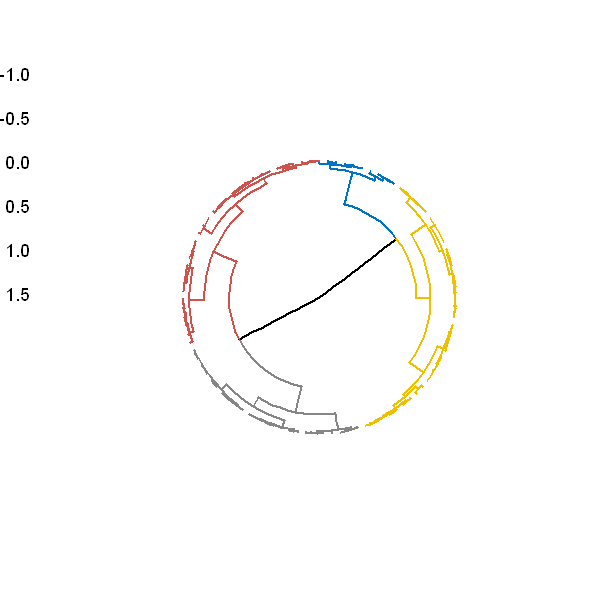

In [69]:

fviz_dend(res.hcpc, 
          cex = 0.5,                     # Label size
          palette = "jco",               # Color palette see ?ggpubr::ggpar
          rect = FALSE, rect_fill = FALSE, # Add rectangle around groups
          rect_border = "jco",           # Rectangle color
          labels_track_height = 0.8      # Augment the room for labels
          , type = 'circular'
                    ,
  show_labels = FALSE
          )